<div style="text-align: center;font-size: 30px;"><b>Podział na test, train i valid. Metryki oceny modelu.</b></div>

<h1>1. Jak dzielić dane testowe?</h1>

<p>&#8594; Nie zajmujemy się tym sami. W Pythonie wkorzystujemy do tego funkcję z sklearn.</p>

In [1]:
from sklearn.model_selection import train_test_split

Zadanie nie jest trudne. Zbiór wszystkich danych dzielimy na trzy rozdzielne podzbiory:
<ul>
    <li>Zbiór train - około 70 - 80% wszystkich danych.</li>
    <li>Zbiór valid - około 10 - 15% wszystkich danych.</li>
    <li>Zbiór test - około 10 - 15% wszystkich danych.</li>
</ul>
<p style="text-align: center; line-height: 1.8; margin: 30px; font-size: 18px; 
           background-color: red; border-radius: 10px; padding: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <b>SPOSÓB PODZIELENIA DANYCH NA GRUPY MA DUŻY WPŁYW NA WYNIKI OTRZYMANE Z MODELU</b>
</p>
Najkrócej mówiąc, każdy zbiór powinien zgodnie reprezentować populacje.

Przykład podziału danych przy użyciu funkcji <font color="#008c1c">test_train_split</font>

In [2]:
import numpy as np
datasetX = np.random.normal(0,1,1000)
X_train, X_test= train_test_split(datasetX, random_state=1,  test_size=0.2)

Argumentami funkcji są:
<ul>
    <li>datasetX - dowolny zbiór lub kilka zbiorów</li>
    <li>random_state - pozwala odtowrzyć losowy podział zbioru danych, czyli "seed" w oparciu o który przydzielamy wartości do zbiorów</li>
    <li>test_size - jak sama nazwa wskazuje</li>
</ul>

In [3]:
#przykłąd wywołania funkcji train_test_split z kilkoma zbiorami
datasetX = np.random.normal(0,1,1000)
datasetY = np.random.normal(0,1,1000)
datasetZ = np.random.normal(0,1,1000)
X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(datasetX,datasetY,datasetZ, random_state=1,  test_size=0.1) 

Warte uwagi jest to, że zbiór valid musimy sobie wyodrębnić sami, na przykład ponownie stosując funkcję <font color="#008c1c"> train_test_split</font>

In [4]:
X_train, X_valid = train_test_split(X_train, random_state=1,  test_size=0.1) 

<h2> Różnica pomiędzy valid i test.</h2>
Uczymy na train, potem patrzymy jak model działa na valid i tak w kółko. <b>Zbioru test używamy tylko raz, pod koniec aby ocenić model.</b>
<p style="text-align: center; line-height: 1.8; margin: 30px; font-size: 18px; 
           background-color: red; border-radius: 10px; padding: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <b>ZBIORU TEST UŻYWAMY TYLKO RAZ NA KOŃCU!!!!</b>
</p>

<h1>2. Wykorzystanie danych do trenowania modelu.</h1>
<h2>Funkcjonalności bilbioteki sklearn</h2>
Zanim przejdziemy dalej chciałym wspomnieć o zawartości bilbioteki <font color="#008c1c">scikit-learn</font>  z których będziemy korzystali w dalszej części noteboka.
<h3>Zbiory danych</h3>
Gdybyśmy mieli potrzebę użyć zbioru do prezentacji, albo przeprowadzenia obliczeń to możemy skorzystać ze zbiorów wbudowanych w bibliotekę takich jak np. zbiór digits (zbiór cyfr), zbiór iris (kwiat irysu) oraz zbiór wine. Każdy z nich otrzymujemy wywołując podobną komendę:

In [5]:
from sklearn.datasets import load_digits, load_iris, load_wine
data_digits = load_digits()
data_iris = load_iris()
data_wine = load_wine()

Następnie możemy wyłuskać z nich zbiór cech i etykiet jako:

In [6]:
digits_x, digits_y = data_digits.data, data_digits.target
iris_x, iris_y = data_iris.data, data_iris.target
wine_x, wine_y = data_wine.data, data_wine.target

Oczywiście w bibliotece jest ich o wiele więcej.

<h3>Modele</h3>
Aby pracować na zaimportowanych danych możemy zaimportować różne modele, takie jak:
<ul>
    <li>LinearRegression() - regresja liniowa.</li>
    <li>DecisionTreeClassifier(seed) - drzewo decyzyjne</li>
    <li>RandomForestClassifier()</li>
    <li>KNeighborsClassifier(k) - klasyfikator k - najbliższych sąsiadów</li>
</ul>
Oczywiście wcześniej je importując:

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

W następujący sposób:

In [8]:
model = RandomForestClassifier()

Przykład trenowania modelu:

In [9]:
from sklearn.metrics import accuracy_score

#tak jak wyżej importujemy sobie dane
data_digits = load_digits()

#tak jak wyżej dzielimy je sobie na cechy i etykiety
digits_x, digits_y = data_digits.data, data_digits.target

#importujemy model
model = RandomForestClassifier()

#dzielimy dane na dane treningowe i testowe
digits_train_x, digits_test_x, digits_train_y, digits_test_y =  train_test_split(digits_x,digits_y,random_state = 1, test_size = 0.2)

#trenjemy model
model.fit(digits_train_x,digits_train_y)

#wsad
result = model.predict(digits_test_x)

print(accuracy_score(digits_test_y,result))

0.9805555555555555


<h2>K - fold Cross Validation</h2>
Technika polegająca na podzieleniu danych treningowych na k równych części - zwanych foldami - z których jedna zostaje zbiorem walidacyjnym, a cała reszta używana jest do treningu. Schemat jest powtarzany k razy, tak aby każdy zbiór miał okazje być zbiorem walidacyjnym. Na koniec liczymy średnią na podstawie wszystkich iteracji.

In [10]:
display(HTML(table4))

NameError: name 'HTML' is not defined

Możemy przeprowadzić walidację k - fold przy użyciu funkcji z biblioteki sklearn:

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
data_digits = load_iris()

iris_x, iris_y = data_iris.data, data_iris.target

model = RandomForestClassifier()

scores = cross_val_score(model,iris_x, iris_y,cv = 5) #cv = cross validation i oznacza to ile foldów
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


<b>Hiperparametrem </b> nazwiemy taki parametr, który musi zostać ustawiony przed rozpoczęciem procesu uczenia modelu. Aby wyznaczyć optymalne hiperparametry możemy skorzystać z <font color="#008c1c">Grid Search</font> lub <font color="#008c1c">Random Search</font>

<h2>Grid Search -  Brute Froce</h2>
Powiedzmy, że model posiada 3 hiperparametry: $\eta $, $\lambda$, $\theta$. Chcemy wyznaczyć takie spośród nich, które gwarantują najlepsze działanie. Aby to zrobić, możemy zastosować metode Brute Force, to znaczy pogrupować każde z każdym i wybrać tę grupę która gwaranuje najlepsze działanie modelu. Takie podejście w kontekście nauczania maszynowego nosi nazwę Grid Search. 

In [13]:
# Wczytanie zbioru danych 'Irysów'
data = load_iris()
X, y = data.data, data.target

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definicja modelu SVM
model = SVC()

# Definicja siatki hiperparametrów
param_grid = {
    'C': [0.1, 1, 10, 100],          # Współczynnik regularyzacji
    'kernel': ['linear', 'rbf'],     # Typ jądra
    'gamma': ['scale', 'auto', 0.1]  # Parametr gamma dla jądra 'rbf'
}

# Grid Search z 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Ocena modelu na danych testowych
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Dokładność na danych testowych:", accuracy_score(y_test, y_pred))

NameError: name 'SVC' is not defined

<h2>Random Search</h2>
Jak powszechnie wiadomo, metoda Brute Force jest niezwykle niewydajna gdy mamy do czynienia z dużą ilością danych, dlatego zamiast sprawdzać każdą kombinację hiperparametrów, możemy wylosować je losowo. Takie podejście nosi nazwę Random Search 

In [243]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Wczytanie zbioru danych 'Iris'
data = load_iris()
X, y = data.data, data.target

# Definicja modelu Random Forest
model = RandomForestClassifier(random_state=42)

# Definicja przestrzeni hiperparametrów (rozstaw parametrów losowych)
param_dist = {
    'n_estimators': randint(50, 200),      # Losowa liczba drzew w lesie (od 50 do 200)
    'max_depth': randint(5, 20),          # Losowa maksymalna głębokość drzewa (od 5 do 20)
    'min_samples_split': randint(2, 10),  # Minimalna liczba próbek do podziału w węźle
}

# Random Search z 10 losowymi kombinacjami i 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Wyświetlenie najlepszych parametrów i wyniku
print("Najlepsze parametry:", random_search.best_params_)
print("Najlepszy wynik dokładności:", random_search.best_score_)

Najlepsze parametry: {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 142}
Najlepszy wynik dokładności: 0.9666666666666668


<h1>3. Metryki oceny modelu.</h1>
Aby ocenić model, wyniki z niego dawane układamy w specjalną tabelką zwaną <b>confuse matrix </i>. 

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Tabelka może mieć różny (zawsze kwadratwy) rozmiar.

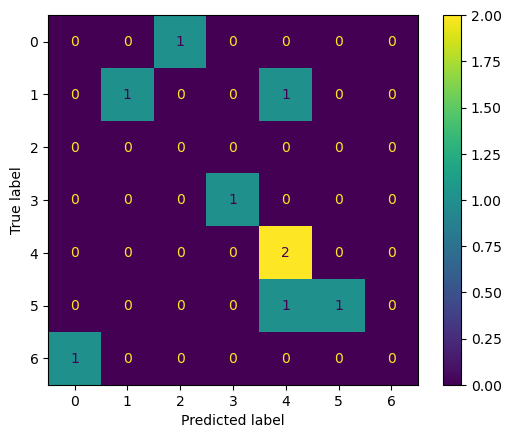

In [155]:
x_true = ["kot","ptasznik","słoń","człowiek","mysz","ptasznik","kot","pies","pies"]
x_pred = ["pies","pies","człowiek","miska","mysz","ptasznik","kot","pies","pies"]
cm = confusion_matrix(x_true, x_pred)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print()

Natomiast ze względów praktycznych preferujemy tabelkę $  2 \times 2 $, utworzoną w następującym schemacie:

In [19]:
display(HTML(table1))

Gdzie:
<ul>
    <li>True positive, czyli poprawna odpowiedź, że coś jest czymś (widzę ptak, mówię, że ptak).</li>
    <li>True negative, czyli poprawna odpowiedź, że coś nie jest czymś (widzę nieptak, mówię, że nieptak).</li>
    <li>False positive, czyli niepoprawna odpowiedź, ze coś jest czymś (widzę ptak, mówię, że nieptak).</li>
    <li>False negative, czyli niepoprawna odpowiedź, że coś nie jest czymś (widzę nieptak, mówię, że ptak).</li>
</ul>
Aby korzystać jednak z takiej reprezentacji, nasze zmienne muszą mieć charakter binarny.

In [27]:
display(HTML(table2))

Numer wkładu,1,2,3,4,5,6,7,8,9,10,11,12
Wartość oczekiwana,ptak,nieptak,nieptak,nieptak,ptak,ptak,ptak,nieptak,ptak,nieptak,nieptak,nieptak
Wartość zwrócona przez model,ptak,nieptak,ptak,nieptak,nieptak,ptak,ptak,ptak,nieptak,nieptak,nieptak,nieptak
Klasyfikacja jako,TP,TN,FN,TN,FP,TP,TP,FN,FP,TN,TN,TN


Na podstawie takiej tabelki konstruujemy macierz.

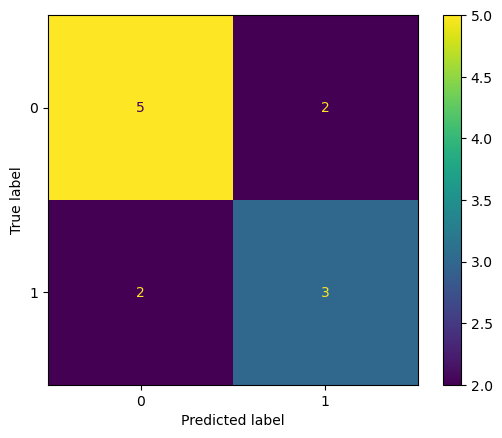

In [187]:
x_true = ["ptak","nieptak","nieptak","nieptak","ptak","ptak","ptak","nieptak","ptak","nieptak","nieptak","nieptak"]
x_pred =  ["ptak","nieptak","ptak","nieptak","nieptak","ptak","ptak","ptak","nieptak","nieptak","nieptak","nieptak"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(x_true,x_pred))
disp.plot()
print()

Majć dane w takim formacie, łatwo jest nam obliczyć przydatne parametry.

<h2> Accuracy - dokładność </h2>

Dokładność liczymy jako: $$A = \frac{TP+TN}{TP+TN+FP+FN}$$ Czyli jest to po prostu wskaźnik mówiący jak często dostajemy od modelu poprawną odpowiedź.

<h2>Precision - precyzja </h2>

Precyzję wyraża się: $$P = \frac{TP}{TP+FP}$$ Informuje jak często model myli przypadki negatywne z pozytywnymi.

<h2> Recall - czułość </h2>
$$R = \frac{TP}{TP+FN}$$
Wysoka czułość informuje, że model rzadko pomija przypadki pozytywne.

<h2> F1 - Score </h2>
$$F1 = 2\cdot \frac{P\cdot R}{P + R}$$ Wskaźnik przydatny gdy chcielibyśmy znaleźć w modelu równowagę pomiędzy precyzją i czułością.

<h1>4. Zadania.</h1>
<b>Zadanie 1.</b> Do poniższej tabelki dopisz klasyfikacje przypadku do jednego z typów TP, TN, FP, FN.

In [33]:
display(HTML(table3))

Numer wkładu,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Wartość oczekiwana,kot,niekot,niekot,niekot,kot,kot,kot,kot,kot,niekot,niekot,kot,niekot,niekot,kot,niekot
Wartość zwrócona przez model,kot,niekot,kot,niekot,niekot,kot,kot,kot,kot,kot,niekot,niekot,kot,kot,niekot,niekot


<b>Zadanie 2.</b> Na podstawie poniższej macierzy pomyłek oblicz współczynniki A, P oraz R.

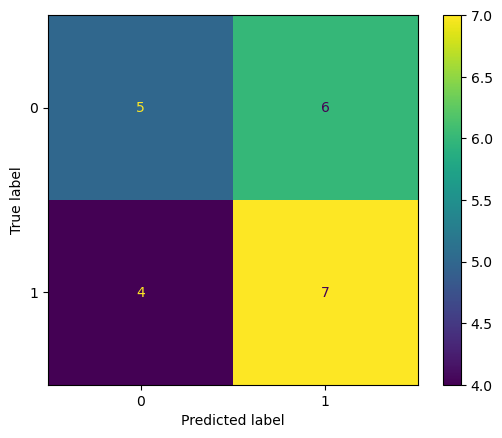

In [275]:
x_true = [1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0]
x_pred =  [0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(x_true,x_pred))
disp.plot()
print()

<b>Zadanie 3.</b>Metodą Grid Search znaleźć optymalne wartości hiperparametrów dla algorytmu <font color="#008c1c">Gradient Boosting</font> . Rozpatrujemy jedynie hiperparametry takie jak:
<ul></ul>
<li>n_estimators: wartości od 50 do 500.</li>
<li>learning_rate: wartości od 0.01 do 1.0.</li>
<li>max_depth: wartości od 3 do 10.</li>
</ul>
Aby móc korzystać z algorytmu Gradient Boosting należy go uprzednio zaimportować z:

In [280]:
from sklearn.ensemble import GradientBoostingClassifier

Model algorytmu można pozyskać jako:

In [286]:
model = GradientBoostingClassifier(random_state = 1)

Aby móc porównać wyniki, ziarno algorytmu zostawmy ustawione na 1.

<b>Zadanie 4.</b> Zaimplementuj funkcje <font color="#008c1c">cross_val_score</font> o następującym nagłówku:

In [298]:
def cros_val_score(x: np.ndarray, y: np.ndarray, cv: int) -> list:
    pass

Gdzie $x$ to tablica cech, $y$ tablica etykiet, a $cv$ to liczba foldów. Zwrócona lista powinna jako swoje elementy zawierać <font color="#008c1c">accuracy_score</font> dla poszczególnych foldów. Funkcja powinna realizować to samo co funckja <font color="#008c1c">cross_val_score</font> z bilbioteki <font color="#008c1c">sklearn</font>.

In [69]:
from IPython.display import display, HTML
table3 = '''<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7fle{background-color:#efefef;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-u1yq{background-color:#c0c0c0;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-u1yq">Numer wkładu</th>
    <th class="tg-u1yq">1</th>
    <th class="tg-u1yq">2</th>
    <th class="tg-u1yq">3</th>
    <th class="tg-u1yq">4</th>
    <th class="tg-u1yq">5</th>
    <th class="tg-u1yq">6</th>
    <th class="tg-u1yq">7</th>
    <th class="tg-u1yq">8</th>
    <th class="tg-u1yq">9</th>
    <th class="tg-u1yq">10</th>
    <th class="tg-u1yq">11</th>
    <th class="tg-u1yq">12</th>
    <th class="tg-u1yq">13</th>
    <th class="tg-u1yq">14</th>
    <th class="tg-u1yq">15</th>
    <th class="tg-u1yq">16</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-u1yq">Wartość oczekiwana</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
  </tr>
  <tr>
    <td class="tg-u1yq">Wartość zwrócona przez model</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">kot</td>
    <td class="tg-7fle">niekot</td>
    <td class="tg-7fle">niekot</td>
  </tr>
</tbody></table>'''

table1 = '''<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-abx8{background-color:#c0c0c0;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-k285{background-color:#fd6864;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-zlqz{background-color:#c0c0c0;border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-51kz{background-color:#009901;border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-efol{background-color:#c0c0c0;border-color:inherit;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-jew0{background-color:#fd6864;border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-yv5q{background-color:#009901;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-0pky" colspan="2" rowspan="2"></th>
    <th class="tg-zlqz" colspan="2">Wartości przewidziane</th>
  </tr>
  <tr>
    <th class="tg-zlqz">Positive</th>
    <th class="tg-zlqz">Negative</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-efol" rowspan="2">Wartości <br>oczekiwane</td>
    <td class="tg-abx8">Positive</td>
    <td class="tg-51kz">True positive (TP)</td>
    <td class="tg-jew0">False negative (FN)</td>
  </tr>
  <tr>
    <td class="tg-abx8">Negative</td>
    <td class="tg-k285">False positive (FP)</td>
    <td class="tg-yv5q">True negative (TN)</td>
  </tr>
</tbody>
</table>'''

table2 = '''<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-yj5y{background-color:#efefef;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-34fe{background-color:#c0c0c0;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-kftd{background-color:#efefef;text-align:left;vertical-align:top}
.tg .tg-y6fn{background-color:#c0c0c0;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-34fe">Numer wkładu</th>
    <th class="tg-34fe">1</th>
    <th class="tg-34fe">2</th>
    <th class="tg-34fe">3</th>
    <th class="tg-34fe">4</th>
    <th class="tg-34fe">5</th>
    <th class="tg-34fe">6</th>
    <th class="tg-34fe">7</th>
    <th class="tg-34fe">8</th>
    <th class="tg-34fe">9</th>
    <th class="tg-y6fn">10</th>
    <th class="tg-y6fn">11</th>
    <th class="tg-y6fn">12</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-34fe">Wartość oczekiwana</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-kftd">nieptak</td>
    <td class="tg-kftd">nieptak</td>
    <td class="tg-kftd">nieptak</td>
  </tr>
  <tr>
    <td class="tg-34fe">Wartość zwrócona przez model</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">ptak</td>
    <td class="tg-yj5y">nieptak</td>
    <td class="tg-kftd">nieptak</td>
    <td class="tg-kftd">nieptak</td>
    <td class="tg-kftd">nieptak</td>
  </tr>
  <tr>
    <td class="tg-34fe">Klasyfikacja jako</td>
    <td class="tg-yj5y">TP</td>
    <td class="tg-yj5y">TN</td>
    <td class="tg-yj5y">FN</td>
    <td class="tg-yj5y">TN</td>
    <td class="tg-yj5y">FP</td>
    <td class="tg-yj5y">TP</td>
    <td class="tg-yj5y">TP</td>
    <td class="tg-yj5y">FN</td>
    <td class="tg-yj5y">FP</td>
    <td class="tg-kftd">TN</td>
    <td class="tg-kftd">TN</td>
    <td class="tg-kftd">TN</td>
  </tr>
</tbody></table>'''

table4 = '''<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-kb39{background-color:#3166ff;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-b3sw{background-color:#efefef;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-exyz{background-color:#fffe65;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-b3sw">Iteracja 1</th>
    <th class="tg-exyz">valid</th>
    <th class="tg-kb39">train</th>
    <th class="tg-kb39">train</th>
    <th class="tg-kb39">train</th>
    <th class="tg-kb39">train</th>
    <th class="tg-kb39">train</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-b3sw">Iteracja 2</td>
    <td class="tg-kb39">train</td>
    <td class="tg-exyz">valid</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
  </tr>
  <tr>
    <td class="tg-b3sw">Iteracja 3</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-exyz">valid</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
  </tr>
  <tr>
    <td class="tg-b3sw">Iteracja 4</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-exyz">valid</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
  </tr>
  <tr>
    <td class="tg-b3sw">Iteracja 5</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-exyz">valid</td>
    <td class="tg-kb39">train</td>
  </tr>
  <tr>
    <td class="tg-b3sw">Iteracja 6</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-kb39">train</td>
    <td class="tg-exyz">valid</td>
  </tr>
</tbody></table>'''